# Create Background estimate for ttbar All-Hadronic Analysis


The luminosities are 36.26, 41.37, 61.6 fb$^{-1}$ for the three runs. 

139230.0


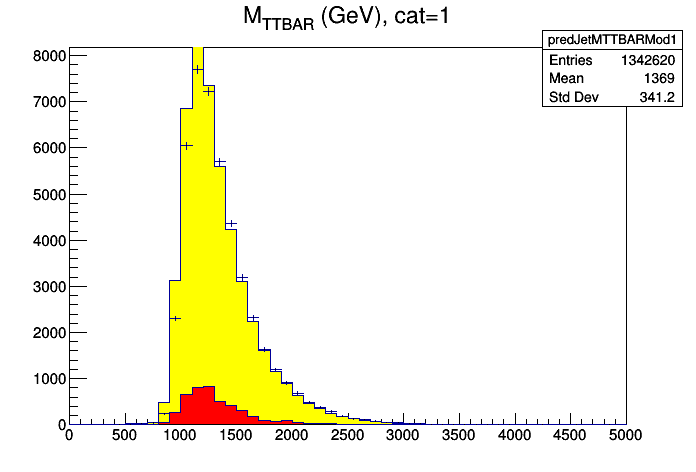

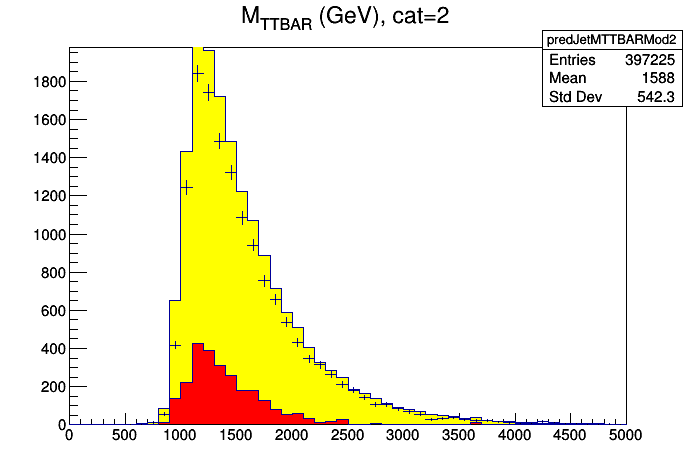

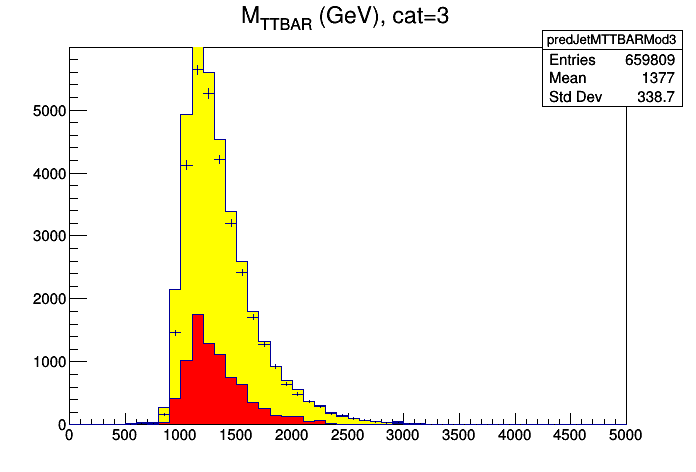

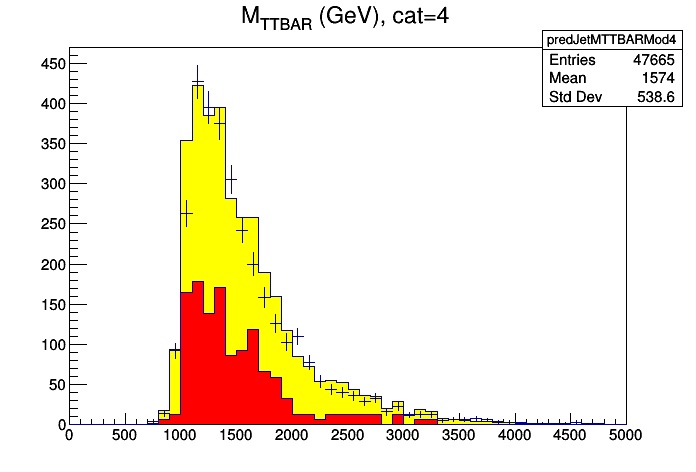

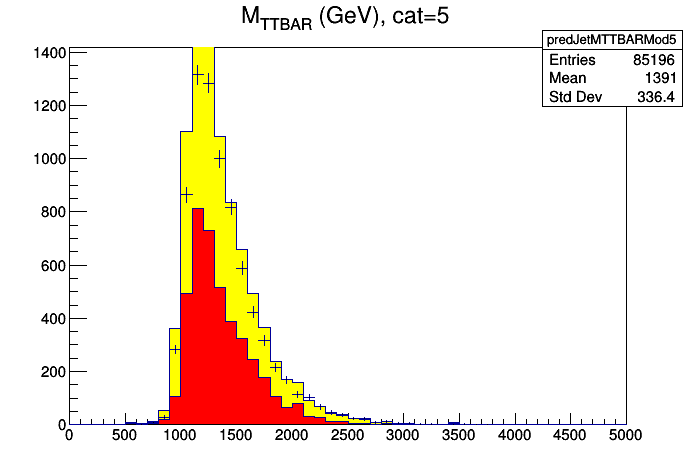

In [13]:
#!/usr/bin/env python

import ROOT
import itertools

import os
import glob
infile = ROOT.TFile('../hists/BkgEstimate_all.root')
ttbarfile = ROOT.TFile('../hists/BkgEstimate_crab__TTJets_TuneCP5_13TeV-madgraphMLM-pythia8_RunIIFall17NanoAODv4-PU2017_12Apr2018_Nano14Dec2018_102X_m.root')

cats = range(1,6)
vars = ['ttbarres/predJetMTTBARMod']
canvs = []
hists = []

lumis = [36.26, 41.37, 61.6] # fb^-1
ttbar_xs = 831.76 #  pb     BR for all-jets: 0.457  # from https://twiki.cern.ch/twiki/bin/view/LHCPhysics/TtbarNNLO
ttbar_nevt = 8026103.   # from https://cmsweb.cern.ch/das/request?input=dataset%3D%2FTTJets_TuneCP5_13TeV-madgraphMLM-pythia8%2FRunIIFall17MiniAODv2-PU2017_12Apr2018_94X_mc2017_realistic_v14-v1%2FMINIAODSIM&instance=prod/global
lumi = sum(lumis) * ( 1000. ) # pb-1 
print lumi

for ivar,var in enumerate(vars):
    for icat in cats:
        cat = str(icat)
        iname = str(ivar)+'_'+str(icat)
        c = ROOT.TCanvas("c"+iname,"c"+iname )
        canvs.append(c)

        obs = infile.Get(var+cat)
        pred = infile.Get(var+cat+"_pred")
        pred.SetFillColor(ROOT.kYellow)
        ttbar_obs = ttbarfile.Get(var + cat)        
        ttbar_obs.SetFillColor(ROOT.kRed)
        ttbar_obs.Scale( ttbar_xs * lumi / ttbar_nevt )
        stack = ROOT.THStack("bkg_" + var + cat, pred.GetTitle() )
        stack.Add( ttbar_obs, 'hist' )
        stack.Add( pred, 'hist' )
        obs.Draw()
        stack.Draw("same")
        obs.Draw("same")
        hists.append( [obs,pred,stack])
        c.Draw()


